In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

#K-means clustering and Principal Component Analysis (PCA)

# Load the CSV file located in the same directory as your script or notebook
df_ff_data = pd.read_csv("2021.csv")



# Select only numeric columns
numeric_columns = df_ff_data.select_dtypes(include=['number'])

# Step 2: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed
numeric_columns_imputed = imputer.fit_transform(numeric_columns)
numeric_columns_imputed = pd.DataFrame(numeric_columns_imputed, columns=numeric_columns.columns)

# Step 3: Scale the DataFrame
data_scaled = StandardScaler().fit_transform(numeric_columns_imputed)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=numeric_columns_imputed.columns)

# Step 4: Initialize the K-means model
model = KMeans(n_clusters=3, random_state=0)

# Step 5: Fit the model
model.fit(df_scaled)

# Step 6: Predict the clusters
clusters = model.predict(df_scaled)

# Create a new column in the DataFrame with the predicted clusters
df_scaled["Cluster"] = clusters

# Step 7: Reduce the number of features to two principal components using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled.iloc[:, :-1])

# Step 8: Create a new DataFrame with PCA data
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_pca["Cluster"] = clusters

# Step 9: Elbow method to find the best value for k
k_values = list(range(1, 11))
inertia_values = []

for k in k_values:
    model_k = KMeans(n_clusters=k, random_state=0)
    model_k.fit(df_pca.iloc[:, :-1])
    inertia_values.append(model_k.inertia_)

elbow_df = pd.DataFrame({"K": k_values, "Inertia": inertia_values})

# Plot the Elbow Curve
elbow_plot = elbow_df.plot(x="K", y="Inertia", title="Elbow Curve", marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '2021.csv'

In [15]:
# Statistical and Regression Analysis for the Entire Dataset
# You can replace the column names as needed for your analysis

# Data Exploration
print(df_ff_data.head())  # Display the first few rows of the dataset

# Summary Statistics
summary_stats = df_ff_data.describe()
print(summary_stats)

# Correlation Analysis
correlation_matrix = df_ff_data.corr()
print(correlation_matrix)

# Linear Regression (example)
from sklearn.linear_model import LinearRegression

# Example: Perform linear regression to predict 'target_column' based on other features
# Linear Regression (example)
from sklearn.linear_model import LinearRegression

# Example: Perform linear regression to predict 'FantasyPoints' based on other features
target_column = 'FantasyPoints'
X = df_ff_data.drop(columns=[target_column])
y = df_ff_data[target_column]

model = LinearRegression()
model.fit(X, y)



# Visualization (example)
import seaborn as sns

# Example: Create a pairplot to visualize relationships
sns.pairplot(df_ff_data)
plt.show()


   Unnamed: 0             Player   Tm Pos  Age   G  GS    Tgt    Rec  \
0           0  Jonathan Taylor*+  IND  RB   22  17  17   51.0   40.0   
1           1      Cooper Kupp*+  LAR  WR   28  17  17  191.0  145.0   
2           2     Deebo Samuel*+  SFO  WR   25  16  15  121.0   77.0   
3           3         Josh Allen  BUF  QB   25  17  17    0.0    0.0   
4           4      Austin Ekeler  LAC  RB   26  16  16   94.0   70.0   

   PassingYds  ...  PassingAtt  RushingYds  RushingTD  RushingAtt  \
0         0.0  ...         0.0      1811.0       18.0       332.0   
1         0.0  ...         1.0        18.0        0.0         4.0   
2        24.0  ...         2.0       365.0        8.0        59.0   
3      4407.0  ...       646.0       763.0        6.0       122.0   
4         0.0  ...         0.0       911.0       12.0       206.0   

   ReceivingYds  ReceivingTD  FantasyPoints   Int  Fumbles  FumblesLost  
0         360.0          2.0          333.0   0.0      4.0          2.0  
1   

C:\Users\kyled\AppData\Local\Temp\ipykernel_32048\1023024545.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_ff_data.corr()


ValueError: could not convert string to float: 'Jonathan Taylor*+'

C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

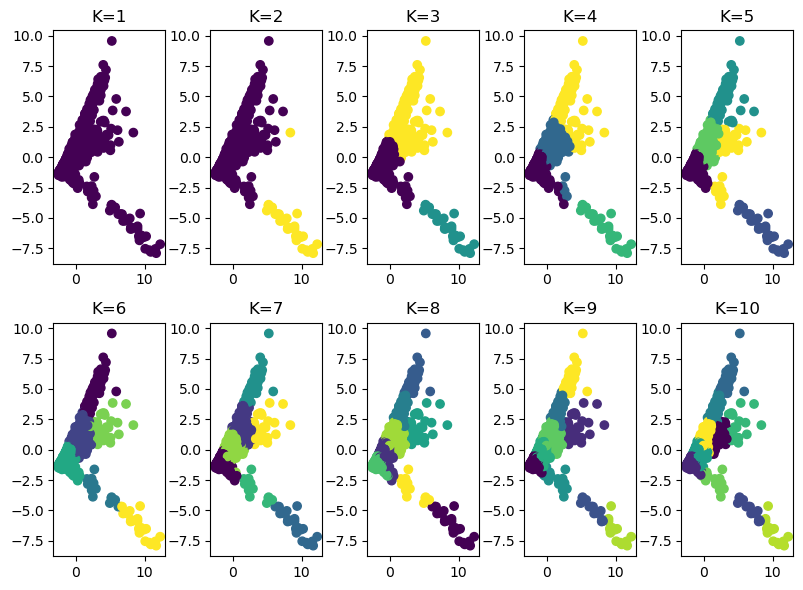

In [17]:
plt.figure(figsize=(8, 6))
for k in k_values:
    plt.subplot(2, 5, k)
    model_k = KMeans(n_clusters=k, random_state=0)
    cluster_labels = model_k.fit_predict(df_pca.iloc[:, :-1])
    plt.scatter(df_pca["PC1"], df_pca["PC2"], c=cluster_labels, cmap='viridis')
    plt.title(f'K={k}')
plt.tight_layout()
plt.show()


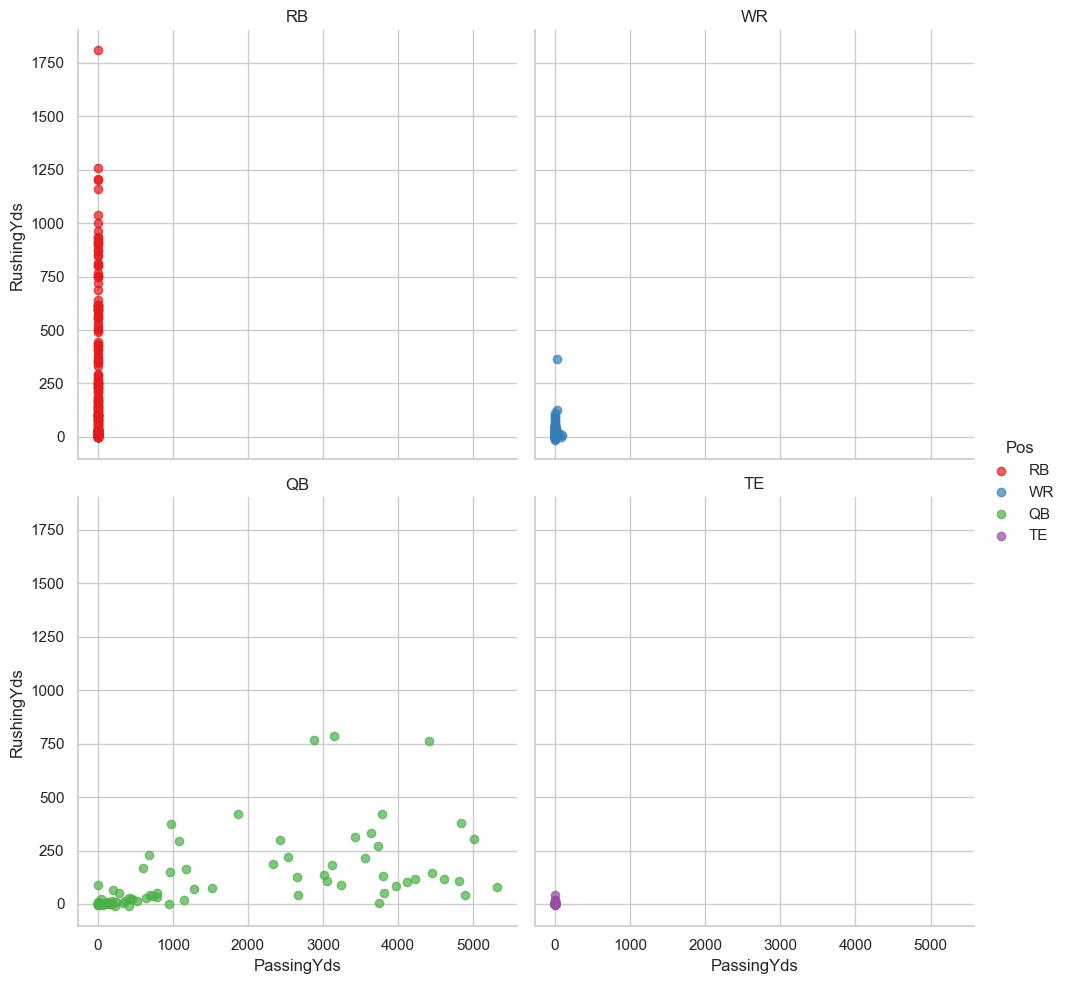

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset by position (RB, WR, QB, and TE)
positions = ['RB', 'WR', 'QB', 'TE']
filtered_data = df_ff_data[df_ff_data['Pos'].isin(positions)]

# Define the columns you want to include in the scatter plot (e.g., 'PassingYds', 'RushingYds', 'ReceivingYds', 'FantasyPoints')
columns_to_plot = ['PassingYds', 'RushingYds', 'ReceivingYds', 'FantasyPoints']

# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot for each position
g = sns.FacetGrid(filtered_data, col="Pos", hue="Pos", palette="Set1", col_wrap=2, height=5)
g.map(plt.scatter, columns_to_plot[0], columns_to_plot[1], alpha=0.7)
g.set(xlabel=columns_to_plot[0], ylabel=columns_to_plot[1])
g.set_titles(col_template="{col_name}")

# Add a legend
g.add_legend()

# Show the plot
plt.show()


C:\Users\kyled\AppData\Local\Temp\ipykernel_32048\862655818.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Color'] = filtered_data['Pos'].map(position_colors)


AttributeError: Use the `.axes` attribute when facet variables are assigned.

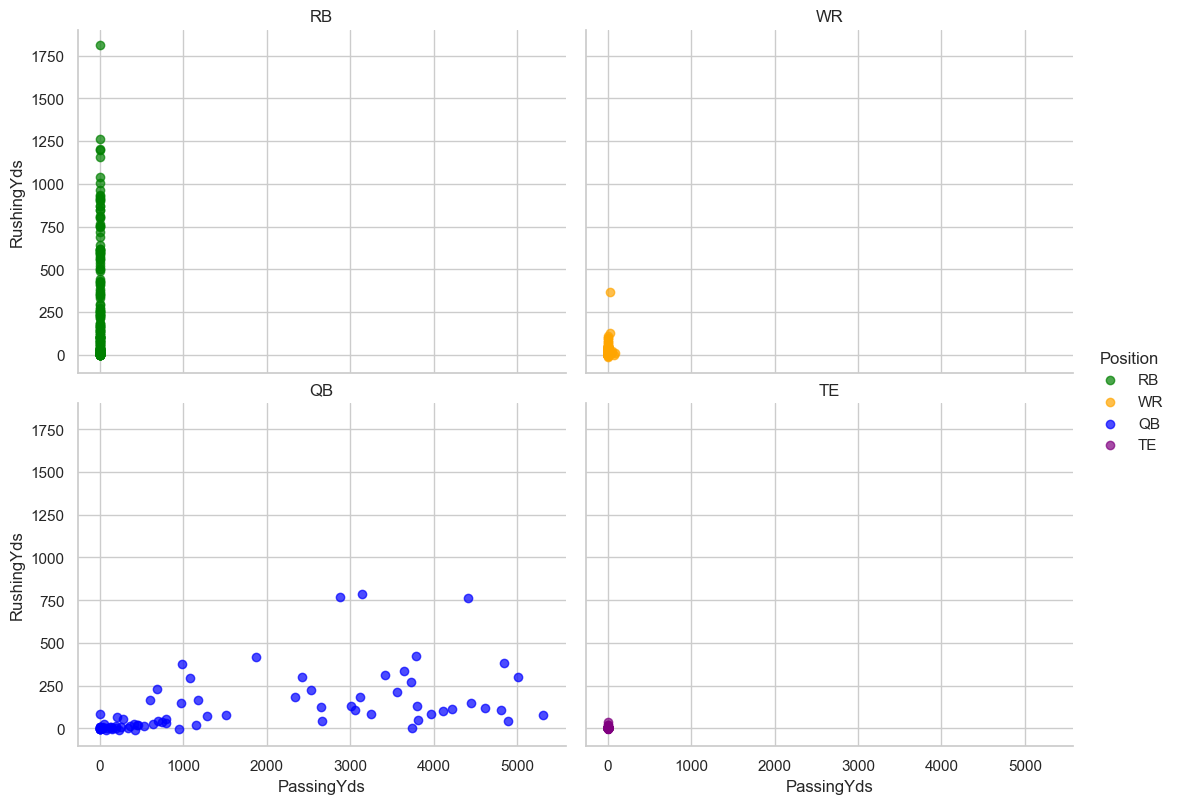

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a more visually pleasing style
sns.set(style="whitegrid")

# Define a custom color palette for different positions
position_colors = {
    'QB': 'blue',
    'RB': 'green',
    'WR': 'orange',
    'TE': 'purple'
}

# Map the colors to the 'Pos' column
filtered_data['Color'] = filtered_data['Pos'].map(position_colors)

# Create a scatter plot for each position
g = sns.FacetGrid(filtered_data, col="Pos", hue="Pos", palette=position_colors, col_wrap=2, height=5)
g.map(plt.scatter, columns_to_plot[0], columns_to_plot[1], alpha=0.7)
g.set(xlabel=columns_to_plot[0], ylabel=columns_to_plot[1])
g.set_titles(col_template="{col_name}")

# Add a legend with a more pleasant title
g.add_legend(title="Position")

# Adjust figure size for better readability
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

# Add grid lines for better clarity
g.ax.grid(True, linestyle='--', alpha=0.6)

# Customize the plot further (optional)
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.suptitle("Player Statistics by Position", fontsize=16)

# Show the plot
plt.show()


C:\Users\kyled\AppData\Local\Temp\ipykernel_32048\3362741008.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Color'] = filtered_data['Pos'].map(position_colors)


AttributeError: Use the `.axes` attribute when facet variables are assigned.

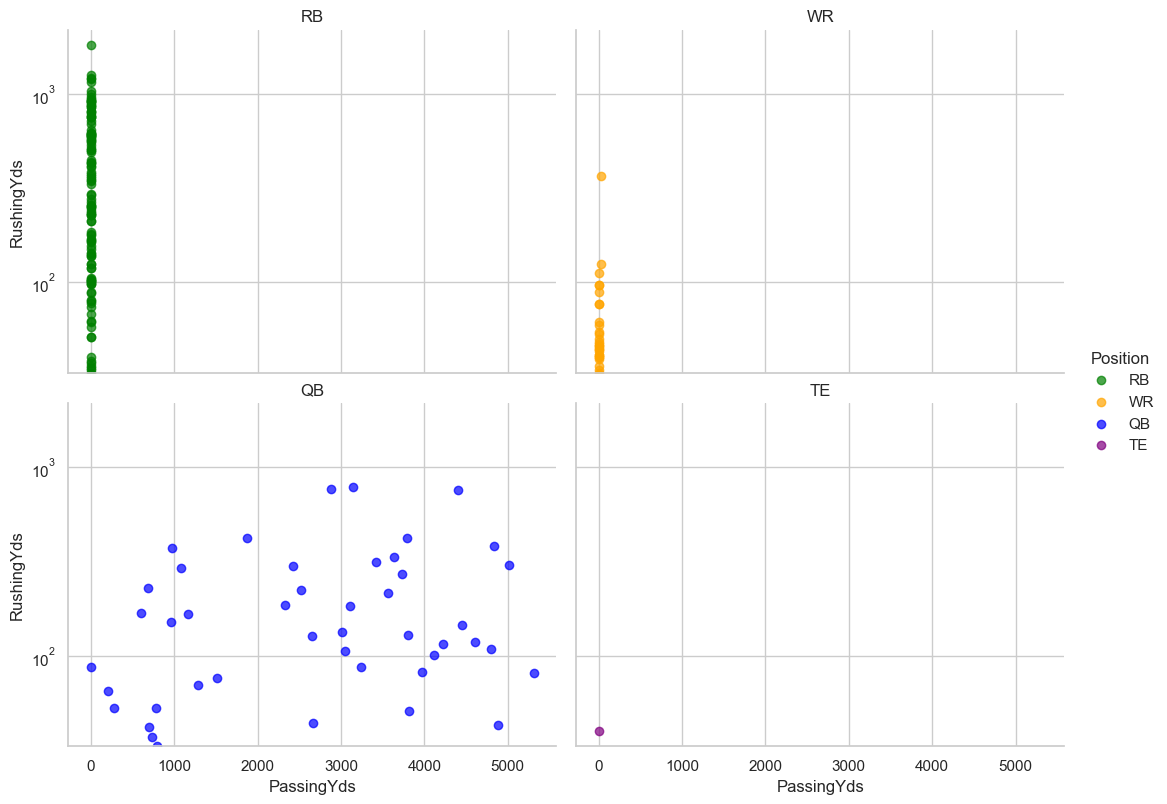

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set a more visually pleasing style
sns.set(style="whitegrid")

# Define a custom color palette for different positions
position_colors = {
    'QB': 'blue',
    'RB': 'green',
    'WR': 'orange',
    'TE': 'purple'
}

# Map the colors to the 'Pos' column
filtered_data['Color'] = filtered_data['Pos'].map(position_colors)

# Create a scatter plot for each position
g = sns.FacetGrid(filtered_data, col="Pos", hue="Pos", palette=position_colors, col_wrap=2, height=5)
g.map(plt.scatter, columns_to_plot[0], columns_to_plot[1], alpha=0.7)

# Apply a logarithmic scale to the 'PassingYds' axis
for ax in g.axes:
    ax.set_yscale('log')

g.set(xlabel=columns_to_plot[0], ylabel=columns_to_plot[1])
g.set_titles(col_template="{col_name}")

# Add a legend with a more pleasant title
g.add_legend(title="Position")

# Adjust figure size for better readability
g.fig.set_figwidth(12)
g.fig.set_figheight(8)

# Add grid lines for better clarity
g.ax.grid(True, linestyle='--', alpha=0.6)

# Customize the plot further (optional)
plt.subplots_adjust(top=0.9)  # Adjust title position
plt.suptitle("Player Statistics by Position (Logarithmic Scale for PassingYds)", fontsize=16)

# Show the plot
plt.show()


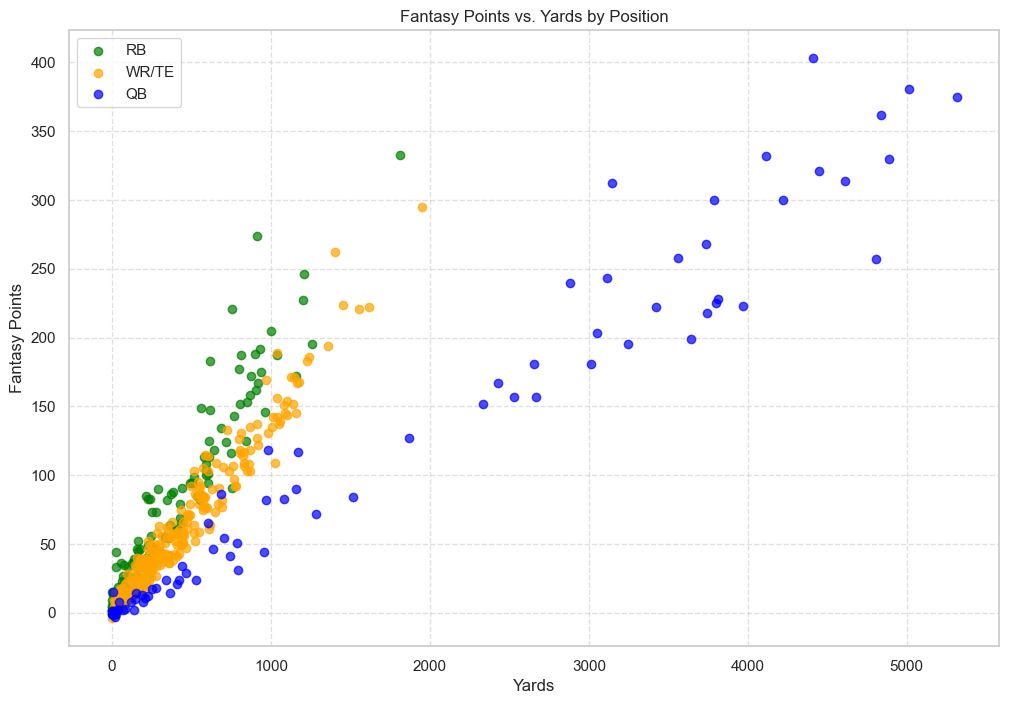

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data by position
rb_data = df_ff_data[df_ff_data['Pos'] == 'RB']
wr_te_data = df_ff_data[(df_ff_data['Pos'] == 'WR') | (df_ff_data['Pos'] == 'TE')]
qb_data = df_ff_data[df_ff_data['Pos'] == 'QB']

# Create scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot for RBs (RushingYds vs. FantasyPoints)
plt.scatter(rb_data['RushingYds'], rb_data['FantasyPoints'], label='RB', alpha=0.7, c='green')

# Scatter plot for WRs and TEs (ReceivingYds vs. FantasyPoints)
plt.scatter(wr_te_data['ReceivingYds'], wr_te_data['FantasyPoints'], label='WR/TE', alpha=0.7, c='orange')

# Scatter plot for QBs (PassingYds vs. FantasyPoints)
plt.scatter(qb_data['PassingYds'], qb_data['FantasyPoints'], label='QB', alpha=0.7, c='blue')

# Add labels and title
plt.xlabel('Yards')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Yards by Position')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


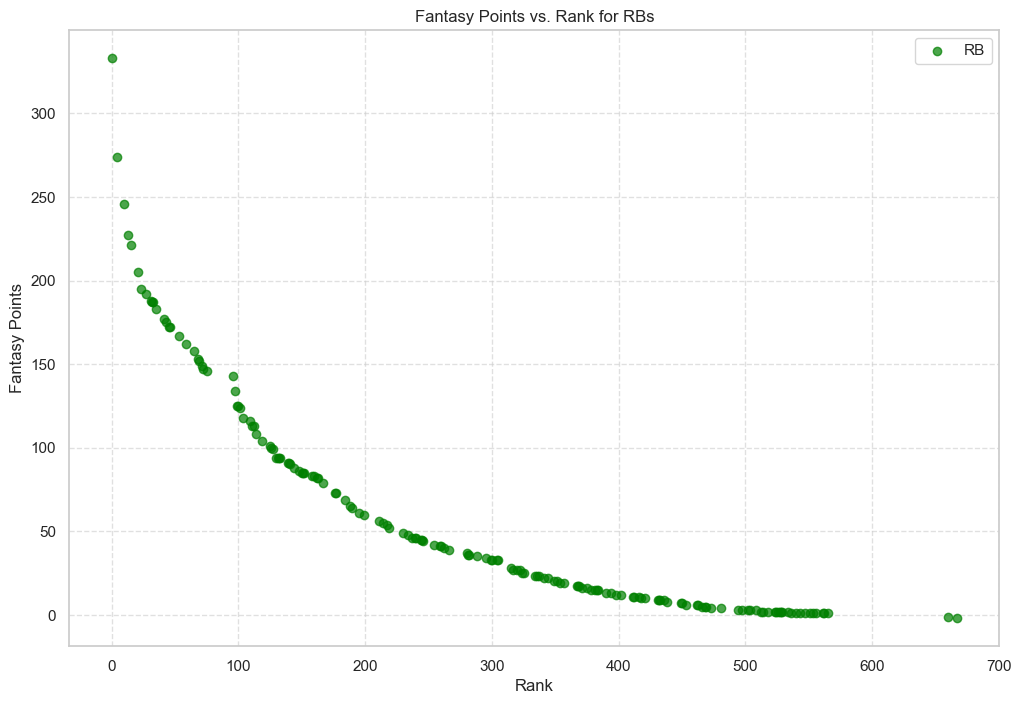

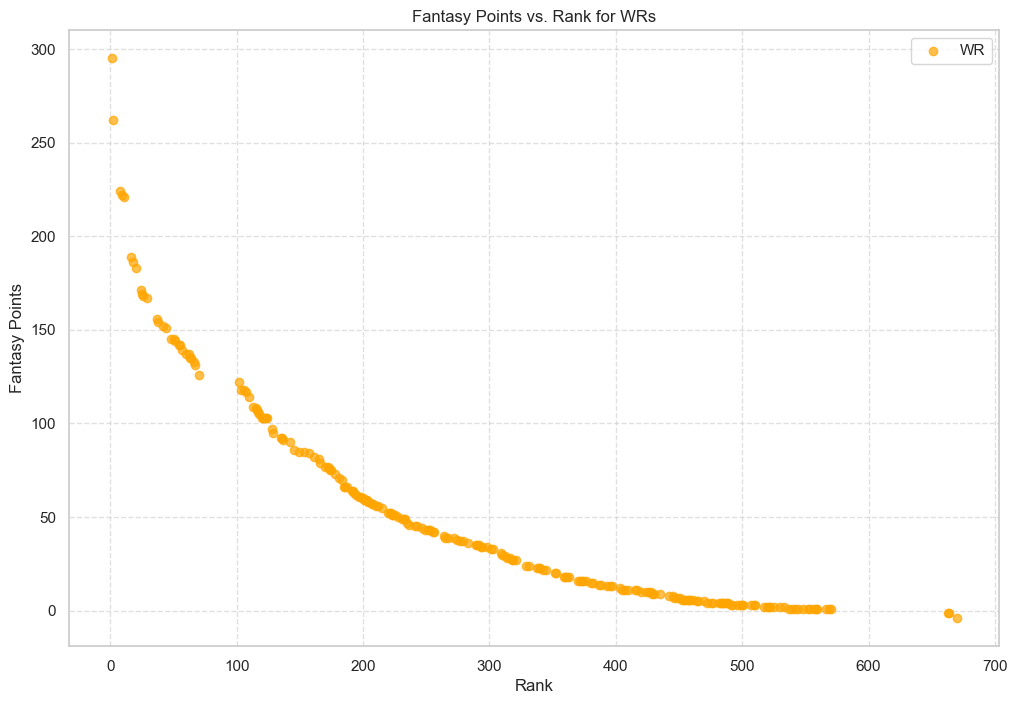

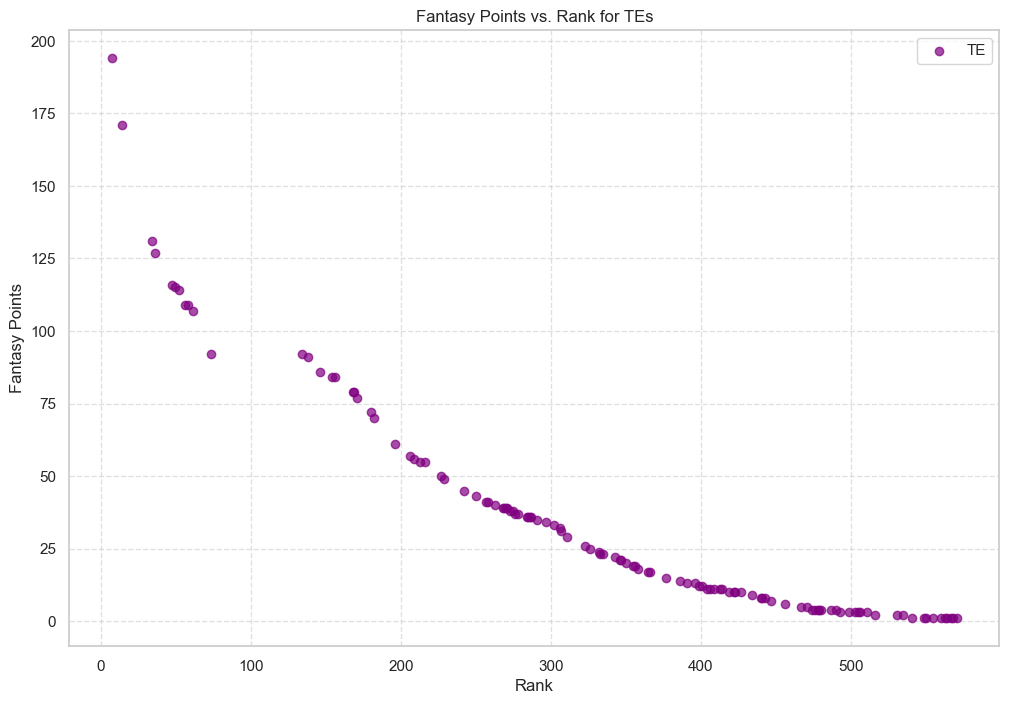

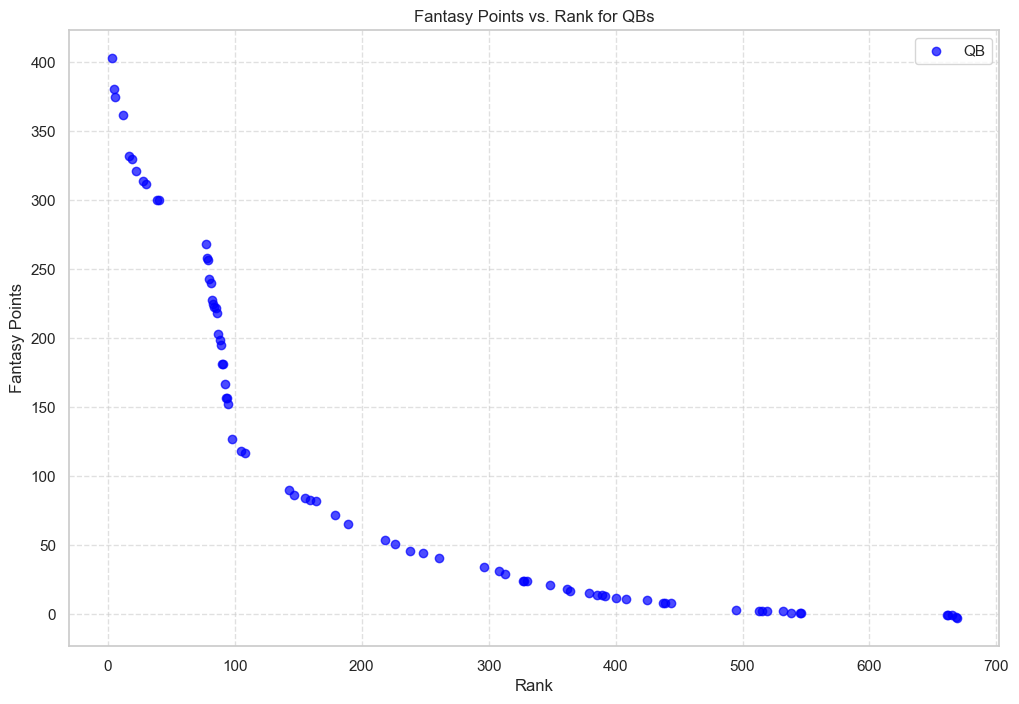

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data by position
rb_data = df_ff_data[df_ff_data['Pos'] == 'RB']
wr_data = df_ff_data[df_ff_data['Pos'] == 'WR']
te_data = df_ff_data[df_ff_data['Pos'] == 'TE']
qb_data = df_ff_data[df_ff_data['Pos'] == 'QB']

# Create scatter plots
plt.figure(figsize=(12, 8))

# Scatter plot for RBs (Rank vs. FantasyPoints)
plt.scatter(rb_data['Unnamed: 0'], rb_data['FantasyPoints'], label='RB', alpha=0.7, c='green')

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Rank for RBs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# Scatter plot for WRs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(wr_data['Unnamed: 0'], wr_data['FantasyPoints'], label='WR', alpha=0.7, c='orange')
plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Rank for WRs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for TEs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(te_data['Unnamed: 0'], te_data['FantasyPoints'], label='TE', alpha=0.7, c='purple')
plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Rank for TEs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for QBs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(qb_data['Unnamed: 0'], qb_data['FantasyPoints'], label='QB', alpha=0.7, c='blue')
plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points vs. Rank for QBs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\kyled\AppData\Local\Temp\ipykernel_32048\700699588.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_for_clustering.fillna(0, inplace=True)
C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kyled\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


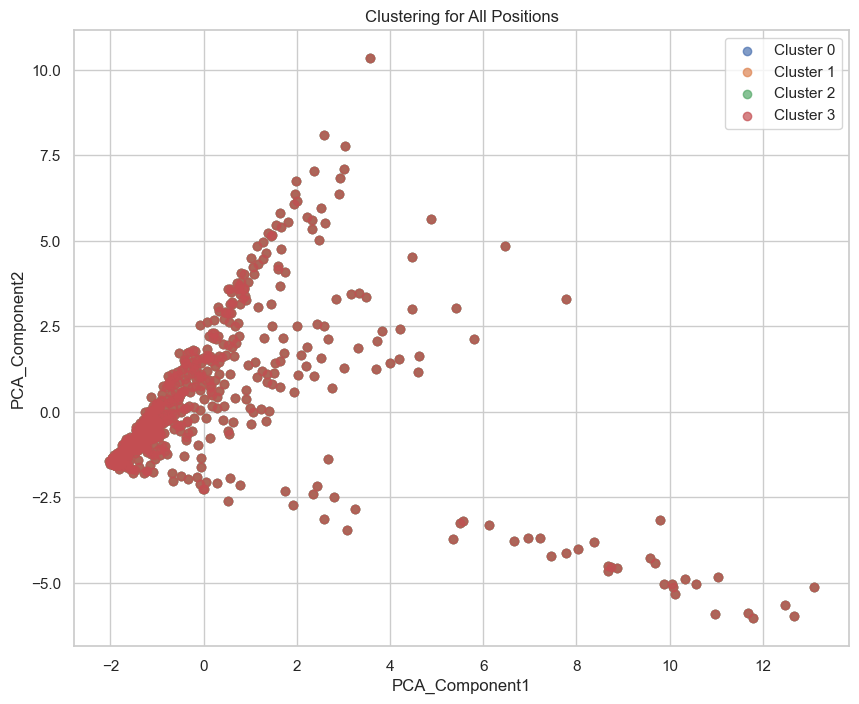

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your data from the '2021.csv' file
file_path = r'C:\Users\kyled\OneDrive\Desktop\Football\2021.csv'
df_ff_data = pd.read_csv(file_path)

# Select the relevant numeric columns for clustering
columns_for_clustering = df_ff_data[['Age', 'G', 'GS', 'Tgt', 'Rec', 'PassingYds', 'PassingTD', 'PassingAtt',
                                    'RushingYds', 'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
                                    'FantasyPoints', 'Int', 'Fumbles', 'FumblesLost']]

# Fill missing values with zeros or other appropriate methods
columns_for_clustering.fillna(0, inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_for_clustering)

# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Perform K-Means clustering with the specified number of clusters
n_clusters = 4
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(pca_data)

# Add the cluster labels to your DataFrame
df_ff_data['Cluster_Labels'] = kmeans_labels

# Create a scatter plot for all positions
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    cluster_df = df_ff_data[df_ff_data['Cluster_Labels'] == cluster]
    plt.scatter(pca_data[:, 0], pca_data[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clustering for All Positions')
plt.xlabel('PCA_Component1')
plt.ylabel('PCA_Component2')
plt.legend()
plt.grid(True)
plt.show()


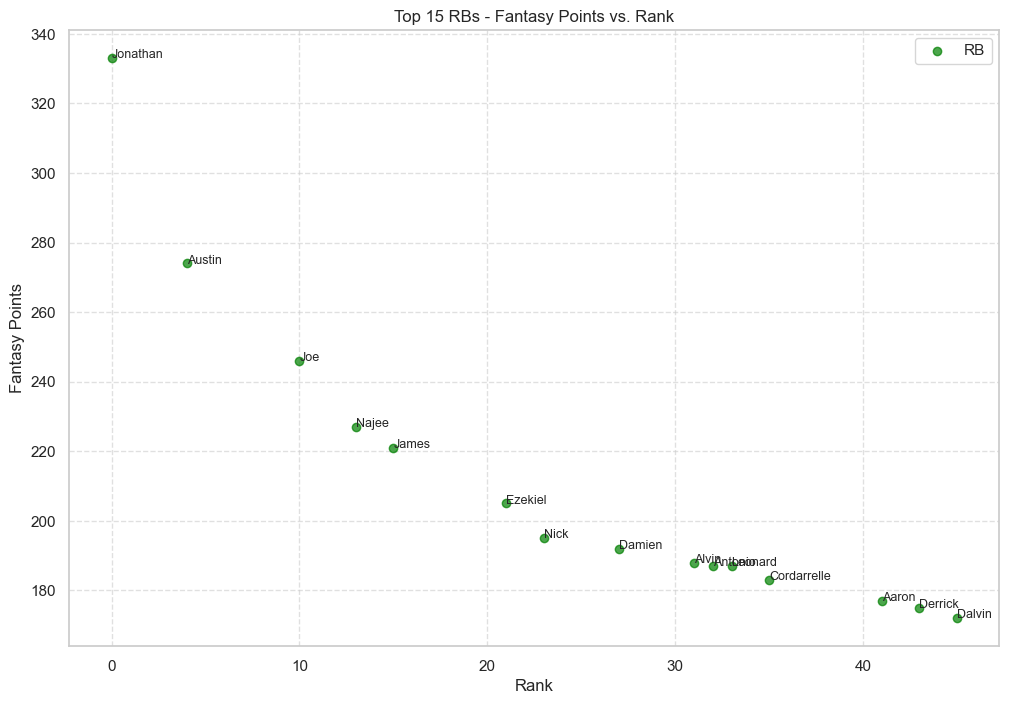

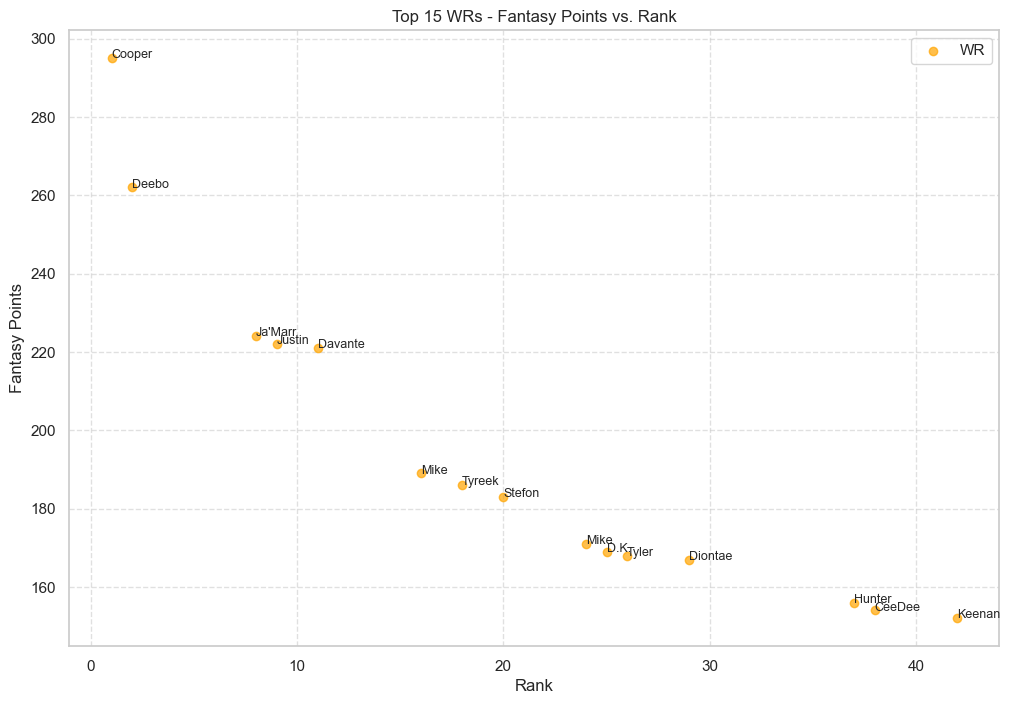

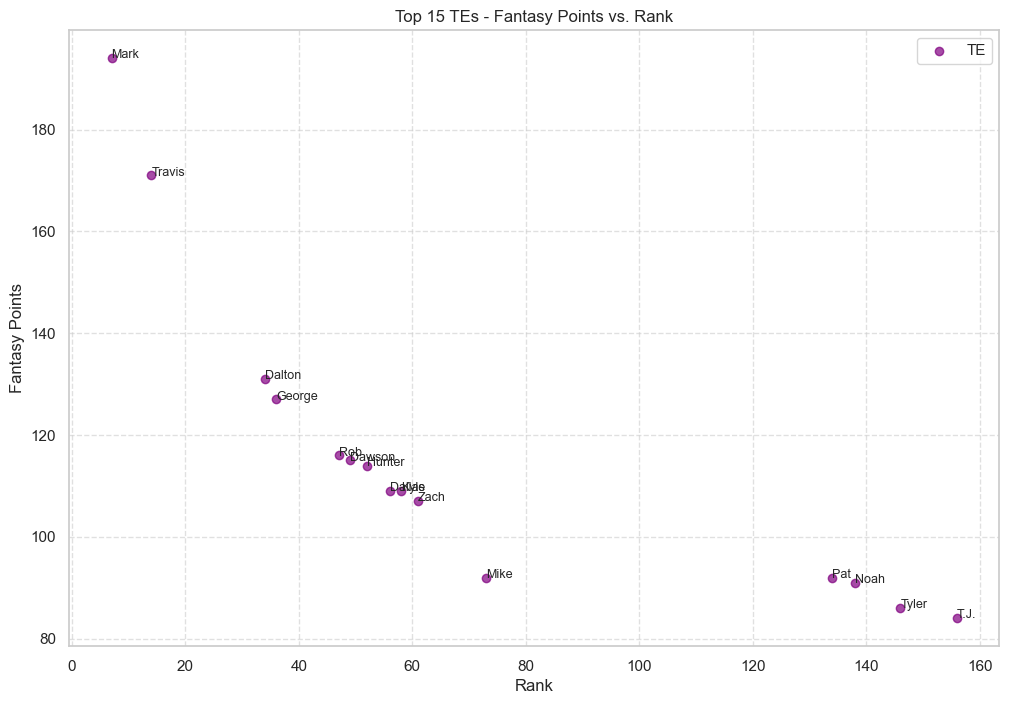

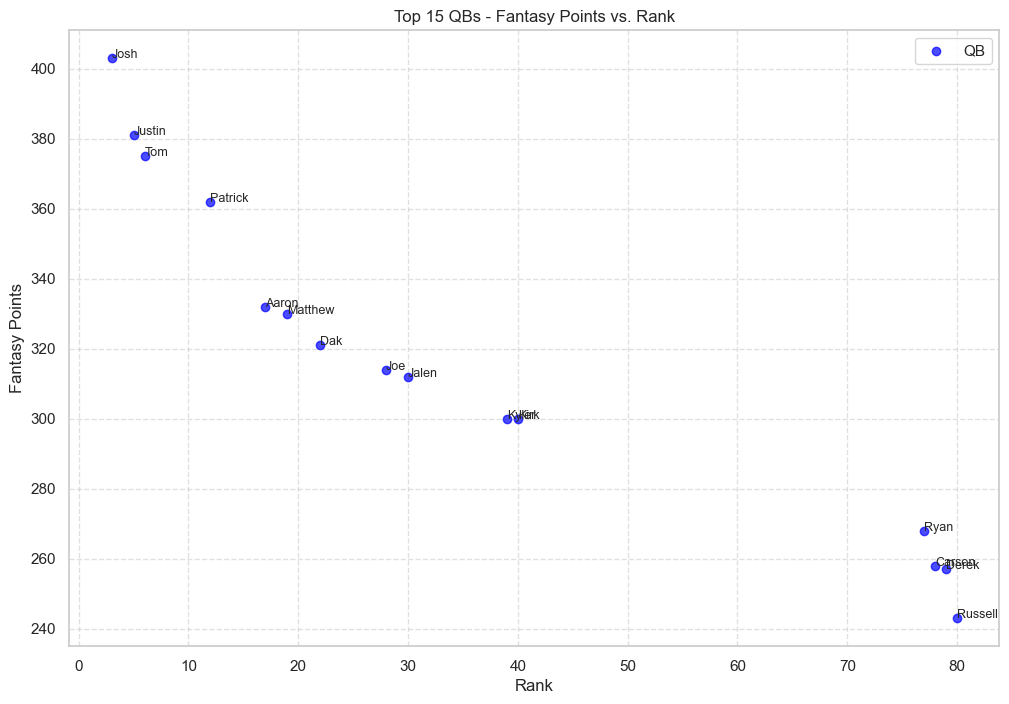

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data by position
rb_data = df_ff_data[df_ff_data['Pos'] == 'RB']
wr_data = df_ff_data[df_ff_data['Pos'] == 'WR']
te_data = df_ff_data[df_ff_data['Pos'] == 'TE']
qb_data = df_ff_data[df_ff_data['Pos'] == 'QB']

# Sort the data by FantasyPoints in descending order and select the top 15 players
rb_top_15 = rb_data.sort_values(by='FantasyPoints', ascending=False).head(15)
wr_top_15 = wr_data.sort_values(by='FantasyPoints', ascending=False).head(15)
te_top_15 = te_data.sort_values(by='FantasyPoints', ascending=False).head(15)
qb_top_15 = qb_data.sort_values(by='FantasyPoints', ascending=False).head(15)

# Create scatter plots for the top 15 players in each position
plt.figure(figsize=(12, 8))

# Scatter plot for RBs (Rank vs. FantasyPoints)
plt.scatter(rb_top_15['Unnamed: 0'], rb_top_15['FantasyPoints'], label='RB', alpha=0.7, c='green')
for i, player in enumerate(rb_top_15['Player']):
    plt.annotate(player.split()[0], (rb_top_15['Unnamed: 0'].iloc[i], rb_top_15['FantasyPoints'].iloc[i]), fontsize=9)

plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Top 15 RBs - Fantasy Points vs. Rank')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for WRs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(wr_top_15['Unnamed: 0'], wr_top_15['FantasyPoints'], label='WR', alpha=0.7, c='orange')
for i, player in enumerate(wr_top_15['Player']):
    plt.annotate(player.split()[0], (wr_top_15['Unnamed: 0'].iloc[i], wr_top_15['FantasyPoints'].iloc[i]), fontsize=9)

plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Top 15 WRs - Fantasy Points vs. Rank')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for TEs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(te_top_15['Unnamed: 0'], te_top_15['FantasyPoints'], label='TE', alpha=0.7, c='purple')
for i, player in enumerate(te_top_15['Player']):
    plt.annotate(player.split()[0], (te_top_15['Unnamed: 0'].iloc[i], te_top_15['FantasyPoints'].iloc[i]), fontsize=9)

plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Top 15 TEs - Fantasy Points vs. Rank')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for QBs (Rank vs. FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(qb_top_15['Unnamed: 0'], qb_top_15['FantasyPoints'], label='QB', alpha=0.7, c='blue')
for i, player in enumerate(qb_top_15['Player']):
    plt.annotate(player.split()[0], (qb_top_15['Unnamed: 0'].iloc[i], qb_top_15['FantasyPoints'].iloc[i]), fontsize=9)

plt.xlabel('Rank')
plt.ylabel('Fantasy Points')
plt.title('Top 15 QBs - Fantasy Points vs. Rank')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


ValueError: x and y must be the same size

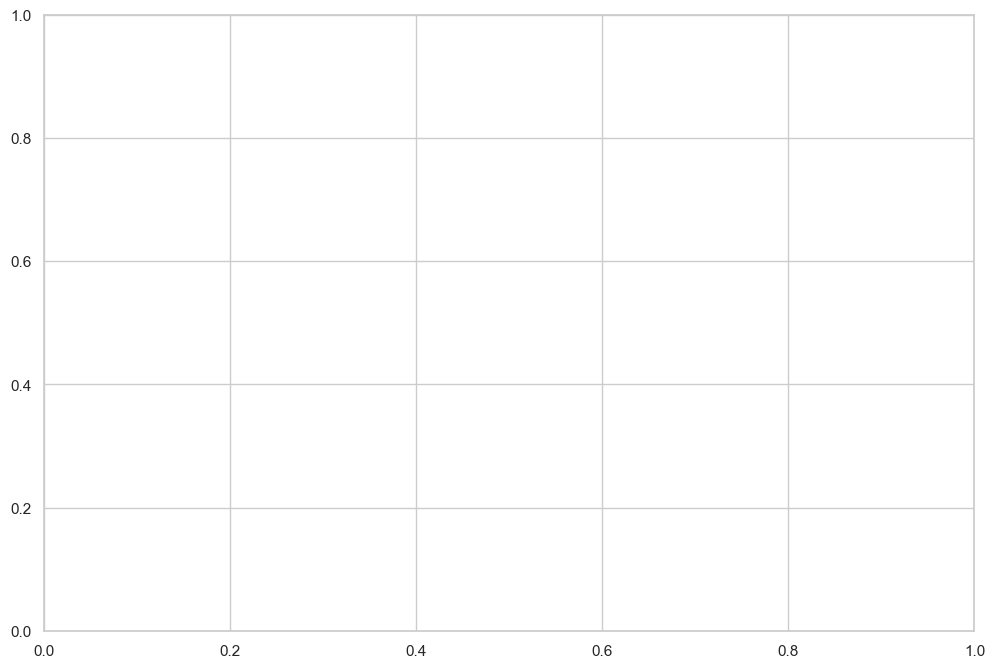

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data by position
rb_data = df_ff_data[df_ff_data['Pos'] == 'RB']
wr_data = df_ff_data[df_ff_data['Pos'] == 'WR']
te_data = df_ff_data[df_ff_data['Pos'] == 'TE']

# Calculate correlations between FantasyPoints of RBs, WRs, and TEs
rb_wr_corr = rb_data['FantasyPoints'].corr(wr_data['FantasyPoints'])
rb_te_corr = rb_data['FantasyPoints'].corr(te_data['FantasyPoints'])
wr_te_corr = wr_data['FantasyPoints'].corr(te_data['FantasyPoints'])

# Create scatter plots to visualize the data
plt.figure(figsize=(12, 8))

# Scatter plot for RBs vs. WRs (FantasyPoints)
plt.scatter(rb_data['FantasyPoints'], wr_data['FantasyPoints'], label=f'RB-WR Corr: {rb_wr_corr:.2f}', alpha=0.7, c='green')
plt.xlabel('RB Fantasy Points')
plt.ylabel('WR Fantasy Points')
plt.title('RB vs. WR Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for RBs vs. TEs (FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(rb_data['FantasyPoints'], te_data['FantasyPoints'], label=f'RB-TE Corr: {rb_te_corr:.2f}', alpha=0.7, c='purple')
plt.xlabel('RB Fantasy Points')
plt.ylabel('TE Fantasy Points')
plt.title('RB vs. TE Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for WRs vs. TEs (FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(wr_data['FantasyPoints'], te_data['FantasyPoints'], label=f'WR-TE Corr: {wr_te_corr:.2f}', alpha=0.7, c='orange')
plt.xlabel('WR Fantasy Points')
plt.ylabel('TE Fantasy Points')
plt.title('WR vs. TE Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


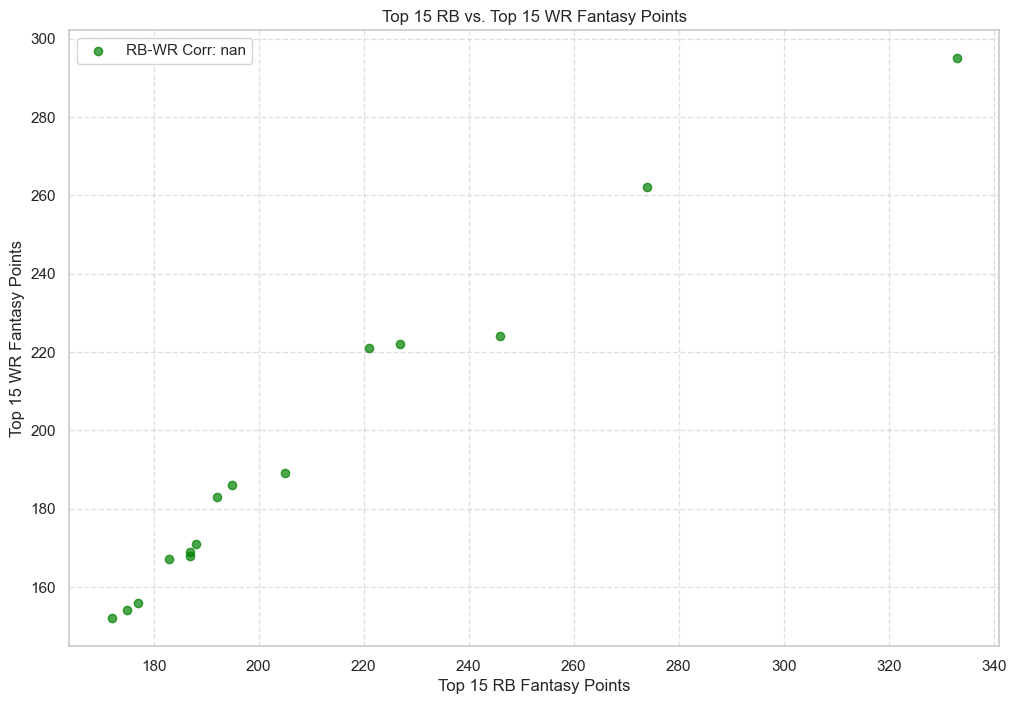

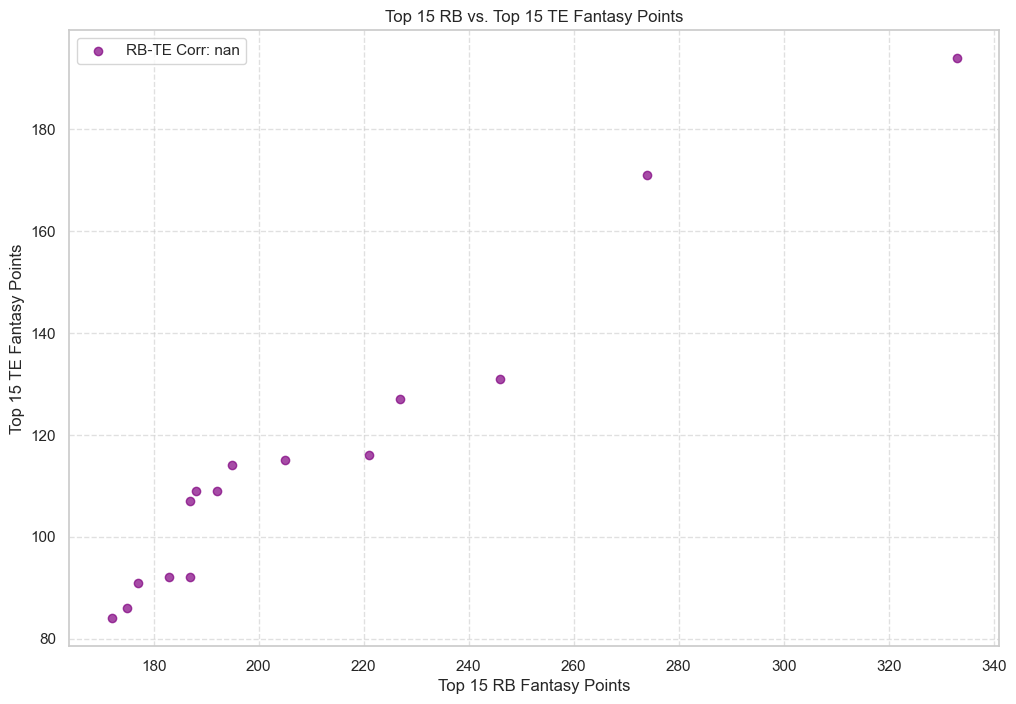

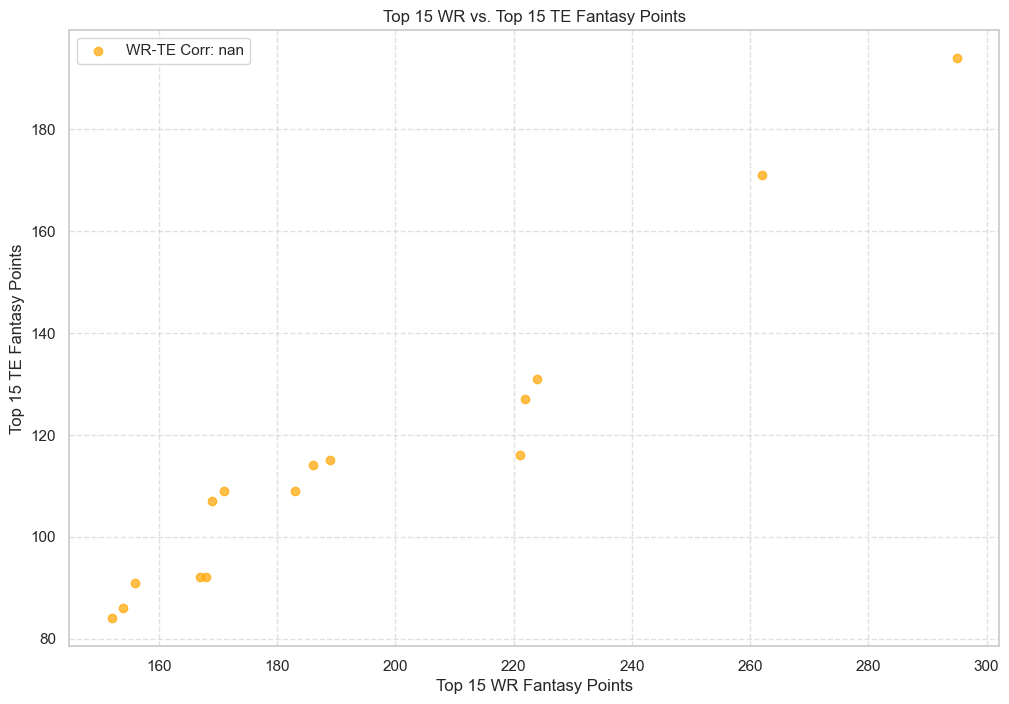

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data by position
top_rb_data = df_ff_data[df_ff_data['Pos'] == 'RB'].nlargest(15, 'FantasyPoints')
top_wr_data = df_ff_data[df_ff_data['Pos'] == 'WR'].nlargest(15, 'FantasyPoints')
top_te_data = df_ff_data[df_ff_data['Pos'] == 'TE'].nlargest(15, 'FantasyPoints')

# Calculate correlations between FantasyPoints of the top 15 RBs, WRs, and TEs
rb_wr_corr = top_rb_data['FantasyPoints'].corr(top_wr_data['FantasyPoints'])
rb_te_corr = top_rb_data['FantasyPoints'].corr(top_te_data['FantasyPoints'])
wr_te_corr = top_wr_data['FantasyPoints'].corr(top_te_data['FantasyPoints'])

# Create scatter plots to visualize the data
plt.figure(figsize=(12, 8))

# Scatter plot for top 15 RBs vs. top 15 WRs (FantasyPoints)
plt.scatter(top_rb_data['FantasyPoints'], top_wr_data['FantasyPoints'], label=f'RB-WR Corr: {rb_wr_corr:.2f}', alpha=0.7, c='green')
plt.xlabel('Top 15 RB Fantasy Points')
plt.ylabel('Top 15 WR Fantasy Points')
plt.title('Top 15 RB vs. Top 15 WR Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for top 15 RBs vs. top 15 TEs (FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(top_rb_data['FantasyPoints'], top_te_data['FantasyPoints'], label=f'RB-TE Corr: {rb_te_corr:.2f}', alpha=0.7, c='purple')
plt.xlabel('Top 15 RB Fantasy Points')
plt.ylabel('Top 15 TE Fantasy Points')
plt.title('Top 15 RB vs. Top 15 TE Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Scatter plot for top 15 WRs vs. top 15 TEs (FantasyPoints)
plt.figure(figsize=(12, 8))
plt.scatter(top_wr_data['FantasyPoints'], top_te_data['FantasyPoints'], label=f'WR-TE Corr: {wr_te_corr:.2f}', alpha=0.7, c='orange')
plt.xlabel('Top 15 WR Fantasy Points')
plt.ylabel('Top 15 TE Fantasy Points')
plt.title('Top 15 WR vs. Top 15 TE Fantasy Points')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


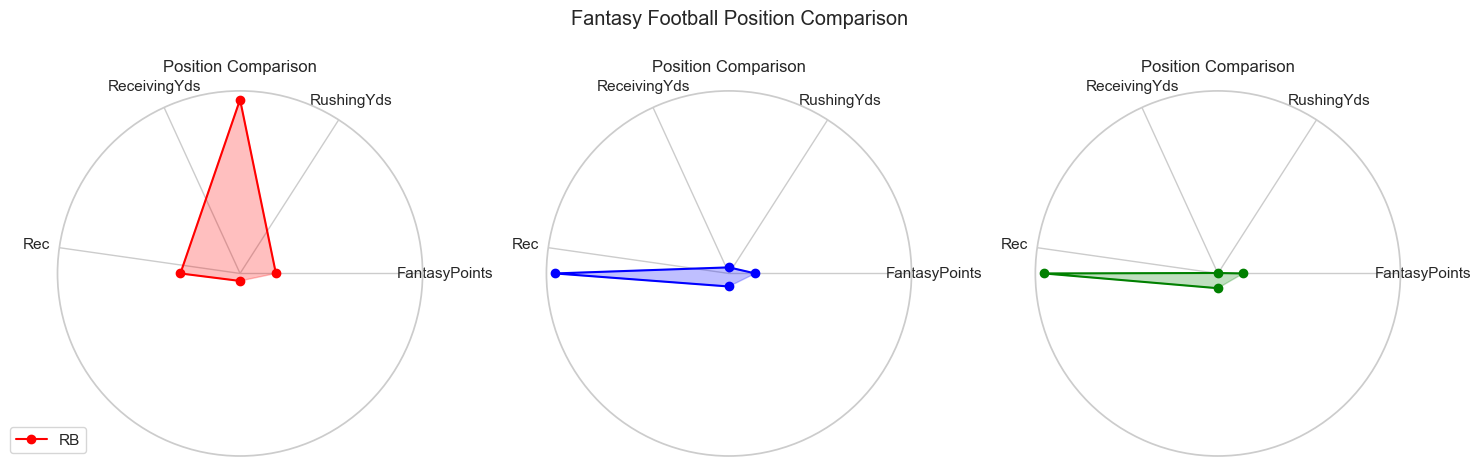

In [30]:
import matplotlib.pyplot as plt
import numpy as np
C


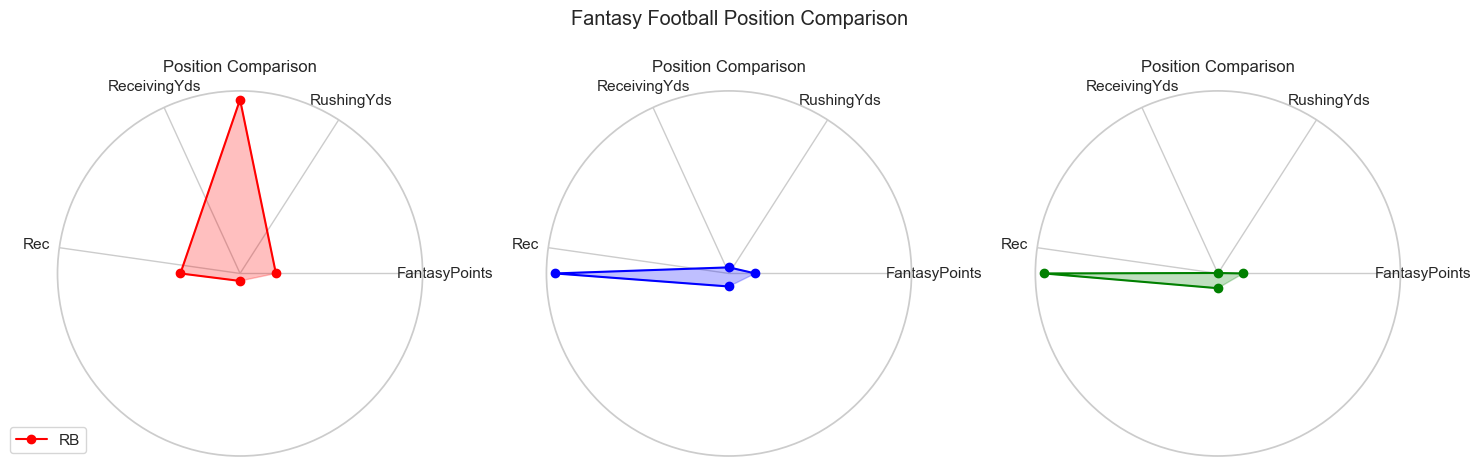

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Select top 15 players for each position
top_rb_data = df_ff_data[df_ff_data['Pos'] == 'RB'].nlargest(15, 'FantasyPoints')
top_wr_data = df_ff_data[df_ff_data['Pos'] == 'WR'].nlargest(15, 'FantasyPoints')
top_te_data = df_ff_data[df_ff_data['Pos'] == 'TE'].nlargest(15, 'FantasyPoints')

# Define the statistics for each position
stats = ['FantasyPoints', 'RushingYds', 'ReceivingYds', 'Rec']  # Remove 'TD' from the stats
positions = ['RB', 'WR', 'TE']

# Calculate the mean values for each statistic for the top 15 players in each position
rb_means = [top_rb_data[stat].mean() for stat in stats]
wr_means = [top_wr_data[stat].mean() for stat in stats]
te_means = [top_te_data[stat].mean() for stat in stats]

# Number of statistics
num_stats = len(stats)

# Create a function to close the radar plot
def close_radar_chart(ax):
    ax.fill_between(range(num_stats), 0, 1, color='white', alpha=0.1)
    ax.set_xticks(range(num_stats))
    ax.set_xticklabels(stats)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title('Position Comparison')

# Create subplots for each position
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'polar': True})

# Plot RB radar chart
close_radar_chart(axes[0])
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, 'o-', label='RB', color='red')
axes[0].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, alpha=0.25, color='red')

# Plot WR radar chart
close_radar_chart(axes[1])
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, 'o-', label='WR', color='blue')
axes[1].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, alpha=0.25, color='blue')

# Plot TE radar chart
close_radar_chart(axes[2])
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, 'o-', label='TE', color='green')
axes[2].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, alpha=0.25, color='green')

# Add legend
axes[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
fig.suptitle('Fantasy Football Position Comparison')

# Show the radar chart
plt.tight_layout()
plt.show()


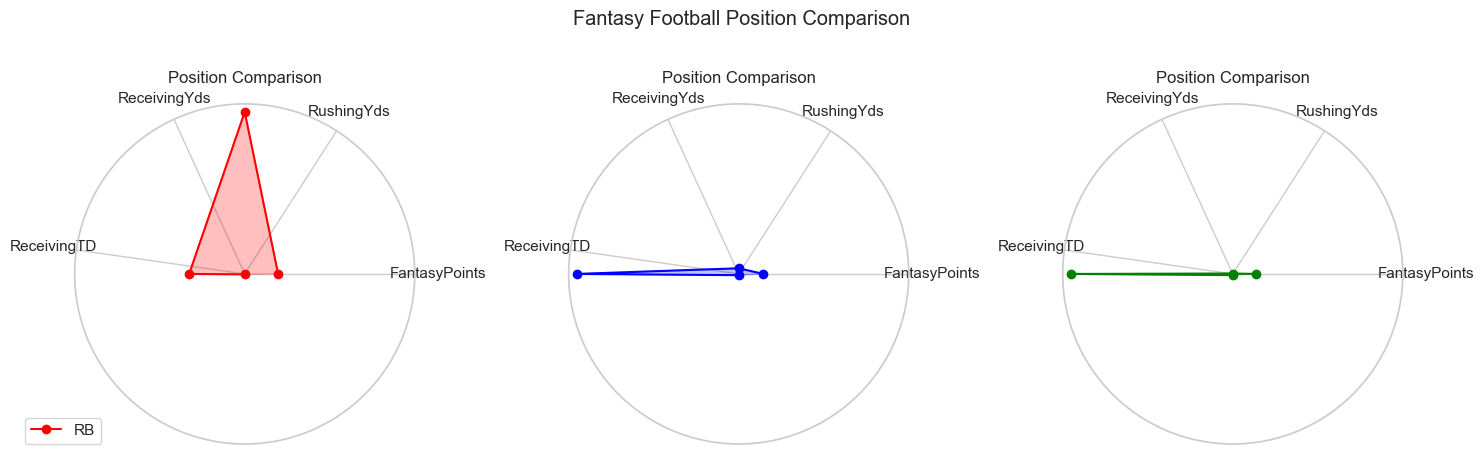

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Select top 15 players for each position
top_rb_data = df_ff_data[df_ff_data['Pos'] == 'RB'].nlargest(15, 'FantasyPoints')
top_wr_data = df_ff_data[df_ff_data['Pos'] == 'WR'].nlargest(15, 'FantasyPoints')
top_te_data = df_ff_data[df_ff_data['Pos'] == 'TE'].nlargest(15, 'FantasyPoints')

# Define the statistics for each position
stats = ['FantasyPoints', 'RushingYds', 'ReceivingYds', 'ReceivingTD']  # Adjusted statistics
positions = ['RB', 'WR', 'TE']

# Calculate the mean values for each statistic for the top 15 players in each position
rb_means = [top_rb_data[stat].mean() for stat in stats]
wr_means = [top_wr_data[stat].mean() for stat in stats]
te_means = [top_te_data[stat].mean() for stat in stats]

# Number of statistics
num_stats = len(stats)

# Create a function to close the radar plot
def close_radar_chart(ax):
    ax.fill_between(range(num_stats), 0, 1, color='white', alpha=0.1)
    ax.set_xticks(range(num_stats))
    ax.set_xticklabels(stats)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title('Position Comparison')

# Create subplots for each position
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'polar': True})

# Plot RB radar chart
close_radar_chart(axes[0])
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, 'o-', label='RB', color='red')
axes[0].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, alpha=0.25, color='red')

# Plot WR radar chart
close_radar_chart(axes[1])
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, 'o-', label='WR', color='blue')
axes[1].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, alpha=0.25, color='blue')

# Plot TE radar chart
close_radar_chart(axes[2])
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, 'o-', label='TE', color='green')
axes[2].fill(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, alpha=0.25, color='green')

# Add legend
axes[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Add a title
fig.suptitle('Fantasy Football Position Comparison')

# Show the radar chart
plt.tight_layout()
plt.show()


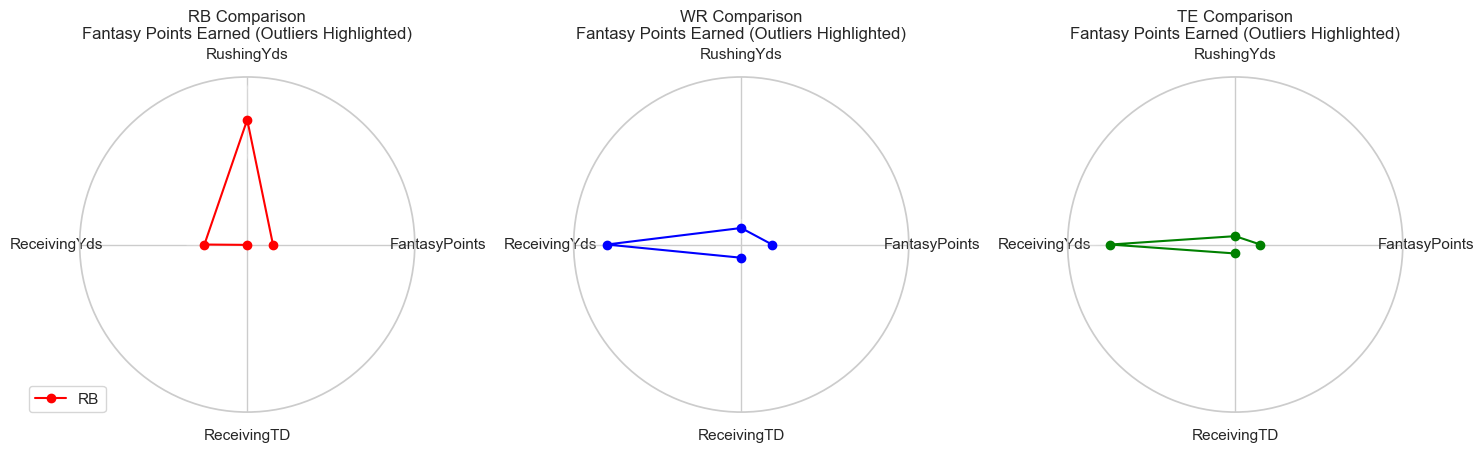

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Select top 15 players for each position
top_rb_data = df_ff_data[df_ff_data['Pos'] == 'RB'].nlargest(15, 'FantasyPoints')
top_wr_data = df_ff_data[df_ff_data['Pos'] == 'WR'].nlargest(15, 'FantasyPoints')
top_te_data = df_ff_data[df_ff_data['Pos'] == 'TE'].nlargest(15, 'FantasyPoints')

# Define the statistics for each position
stats = ['FantasyPoints', 'RushingYds', 'ReceivingYds', 'ReceivingTD']  # Adjusted statistics
positions = ['RB', 'WR', 'TE']

# Calculate the mean values for each statistic for the top 15 players in each position
rb_means = np.array([top_rb_data[stat].mean() for stat in stats])
wr_means = np.array([top_wr_data[stat].mean() for stat in stats])
te_means = np.array([top_te_data[stat].mean() for stat in stats])

# Calculate the standard deviations for each statistic for the top 15 players in each position
rb_stds = np.array([top_rb_data[stat].std() for stat in stats])
wr_stds = np.array([top_wr_data[stat].std() for stat in stats])
te_stds = np.array([top_te_data[stat].std() for stat in stats])

# Number of statistics
num_stats = len(stats)

# Create a function to close the radar plot
def close_radar_chart(ax, position_label, means, stds):
    ax.fill_between(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), means - stds, means + stds, color='white', alpha=0.2)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num_stats, endpoint=False))
    ax.set_xticklabels(stats)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title(f'{position_label} Comparison\nFantasy Points Earned (Outliers Highlighted)')

# Create subplots for each position
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'polar': True})

# Plot RB radar chart
close_radar_chart(axes[0], 'RB', rb_means, rb_stds)
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, 'o-', label='RB', color='red')

# Plot WR radar chart
close_radar_chart(axes[1], 'WR', wr_means, wr_stds)
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, 'o-', label='WR', color='blue')

# Plot TE radar chart
close_radar_chart(axes[2], 'TE', te_means, te_stds)
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, 'o-', label='TE', color='green')

# Add legend
axes[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.tight_layout()
plt.show()


TypeError: unsupported operand type(s) for -: 'list' and 'list'

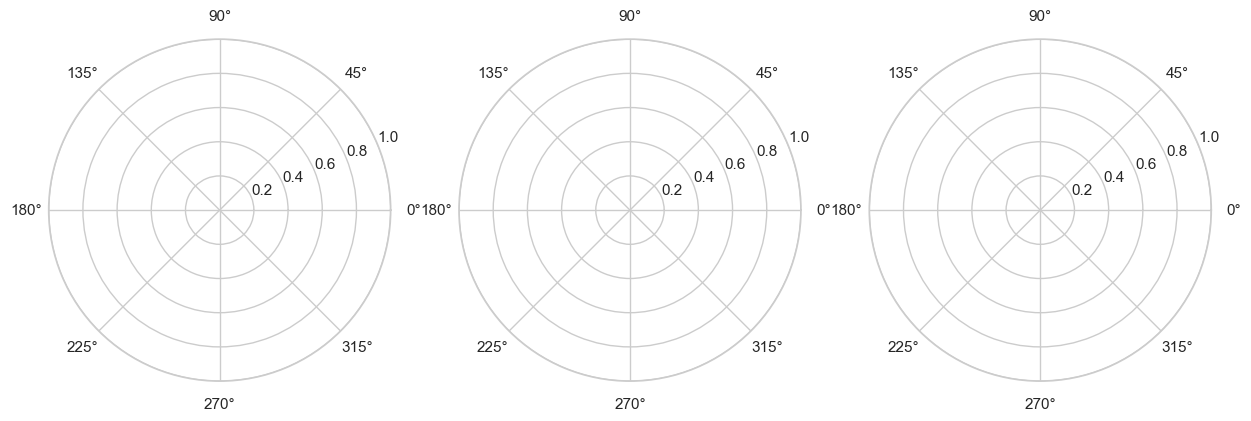

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Select top 15 players for each position
top_rb_data = df_ff_data[df_ff_data['Pos'] == 'RB'].nlargest(15, 'FantasyPoints')
top_wr_data = df_ff_data[df_ff_data['Pos'] == 'WR'].nlargest(15, 'FantasyPoints')
top_te_data = df_ff_data[df_ff_data['Pos'] == 'TE'].nlargest(15, 'FantasyPoints')

# Define the statistics for each position
stats = ['FantasyPoints', 'RushingYds', 'ReceivingYds', 'ReceivingTD']  # Adjusted statistics
positions = ['RB', 'WR', 'TE']

# Calculate the mean values for each statistic for the top 15 players in each position
rb_means = [top_rb_data[stat].mean() for stat in stats]
wr_means = [top_wr_data[stat].mean() for stat in stats]
te_means = [top_te_data[stat].mean() for stat in stats]

# Calculate the standard deviations for each statistic for the top 15 players in each position
rb_stds = [top_rb_data[stat].std() for stat in stats]
wr_stds = [top_wr_data[stat].std() for stat in stats]
te_stds = [top_te_data[stat].std() for stat in stats]

# Calculate the threshold for outliers (mean + 1 standard deviation)
rb_threshold = [mean + std for mean, std in zip(rb_means, rb_stds)]
wr_threshold = [mean + std for mean, std in zip(wr_means, wr_stds)]
te_threshold = [mean + std for mean, std in zip(te_means, te_stds)]

# Number of statistics
num_stats = len(stats)

# Create a function to close the radar plot with outliers highlighted
def close_radar_chart(ax, position_label, means, stds, threshold):
    ax.fill_between(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), means - stds, means + stds, color='white', alpha=0.2)
    ax.fill_between(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), threshold, color='red', alpha=0.2)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num_stats, endpoint=False))
    ax.set_xticklabels(stats)
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title(f'Top 15 {position_label} Comparison\nFantasy Points Earned (Outliers Highlighted)')

# Create subplots for each position
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'polar': True})

# Plot RB radar chart
close_radar_chart(axes[0], 'RB', rb_means, rb_stds, rb_threshold)
axes[0].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), rb_means, 'o-', label='RB', color='red')

# Plot WR radar chart
close_radar_chart(axes[1], 'WR', wr_means, wr_stds, wr_threshold)
axes[1].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), wr_means, 'o-', label='WR', color='blue')

# Plot TE radar chart
close_radar_chart(axes[2], 'TE', te_means, te_stds, te_threshold)
axes[2].plot(np.linspace(0, 2 * np.pi, num_stats, endpoint=False), te_means, 'o-', label='TE', color='green')

# Add legend
axes[0].legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.tight_layout()
plt.show()
